In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor
from scipy.stats import loguniform




In [31]:
X_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_cancer')
X_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_cancer')
y_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_cancer')
y_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_cancer')
X_train.head()

,Unnamed: 0,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,26866,7.545069,43.847886,0.177751,25.769737,0.390028,63.316988,0.466497,0.022892,1.898538,0.028203,0.003371
1,17315,8.002069,33.595649,0.436431,37.037343,0.533005,143.588459,0.006337,0.016178,0.873168,0.166569,0.000000
2,2959,9.828316,37.331035,0.463245,49.598988,0.789357,89.722580,0.000000,0.089666,0.084702,1.788017,0.000000
3,40472,8.751480,43.918410,0.138715,30.074143,0.397489,2.182078,0.106562,0.024344,0.035629,0.033554,0.000400
4,7381,11.529544,43.702621,0.598819,47.224013,0.931000,1537.337892,0.189448,0.059527,0.885184,8.762791,0.000468


In [32]:
X_test.drop('Unnamed: 0', axis=1, inplace=True)
X_train.drop('Unnamed: 0', axis=1, inplace=True)
y_test.drop('Unnamed: 0', axis=1, inplace=True)
y_train.drop('Unnamed: 0', axis=1, inplace=True)


In [33]:
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)




In [34]:
y_train.shape

(54242,)

In [35]:
X_test.shape

(18081, 11)

In [36]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,8.260923,44.807446,0.200130,24.311750,0.292204,0.263212,0.252746,0.102298,0.096192,0.123549,0.012109
1,9.794192,46.703549,0.640794,31.514090,0.433853,735.115559,0.583733,0.094358,1.062287,2.712631,0.000028
2,7.191317,44.476045,0.000000,0.000000,0.000000,0.000000,0.457642,0.009035,0.009416,0.023953,0.000000
3,8.563999,43.463899,0.428739,28.575656,0.369444,431.412957,0.726235,0.450807,0.084783,0.630918,0.000000
4,5.819555,36.900358,0.109304,18.263915,0.202286,106.243269,0.463877,0.899886,0.176801,0.949391,0.000000


In the pre-processeing notebook, I have already done multiple OLS on the data and found no reasonable correlation. In this notebook, the first type of model I will use will be random forest.

In [8]:
# Instantiate RandomForestRegressor and randomly search for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {'n_estimators': sp_randInt(1,500), 'max_depth':sp_randInt(1,30)}

rs = RandomizedSearchCV(rf, params)

In [9]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1683e15b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1683b36a0>})

In [10]:
rs.best_estimator_

RandomForestRegressor(max_depth=24, n_estimators=193)

In [11]:
rf = RandomForestRegressor(max_depth=24, n_estimators=193)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=24, n_estimators=193)

In [12]:
y_pred = rf.predict(X_test)

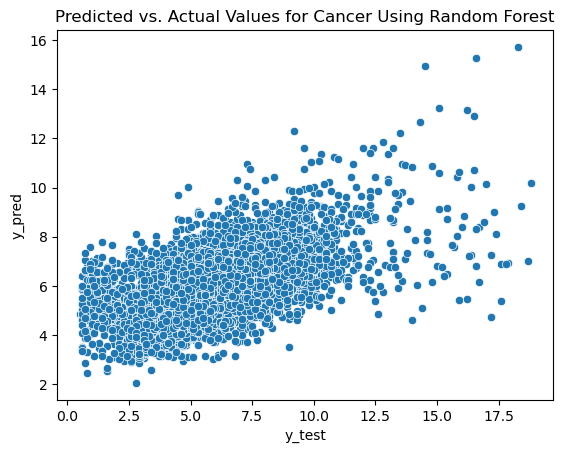

In [13]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for Cancer Using Random Forest')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [14]:
# Printing the metrics I am interested in
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4426694639771308
MAE: 0.9521442198367742
MSE: 1.8432118423469621
RMSE: 1.3576493812273338


Random Forest is still not a good model with the R2 value at 0.44.

In [17]:
# Instantiating AdaBoostRegressor and fitting it to the training data
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [18]:
y_pred = ada.predict(X_test)

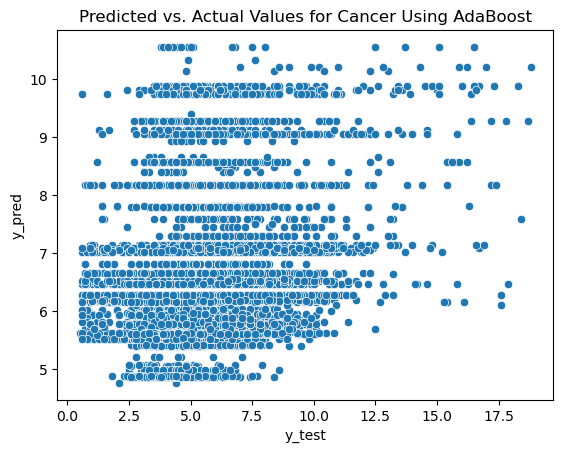

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for Cancer Using AdaBoost')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [ ]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.03404484159174981
MAE: 1.3675407630942722
MSE: 3.419808487689778
RMSE: 1.8492724211672487


Since Adaboost with the default hyperparameters is not giving reasonable results, the next step will be to search for the best hyperparameters.

In [21]:
# Instantiate AdaBoost Regressor and randomly search for best hyperparameters n_estimators and learning rate
ada = AdaBoostRegressor()
params = {'n_estimators': sp_randInt(1,500), 'learning_rate':sp_randFloat(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [22]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16b33b460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16a9581f0>})

In [23]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=74.30396622508137, n_estimators=3)

In [24]:
ada = AdaBoostRegressor(learning_rate=74.30396622508137, n_estimators=3)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=74.30396622508137, n_estimators=3)

In [25]:
y_pred = ada.predict(X_test)

In [26]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -9.00915180509855
MAE: 5.461290857806536
MSE: 33.10241579558651
RMSE: 5.753469891777179


This just made the results worse. Next will be Gradient Boost Regressor.

In [28]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [29]:
y_pred = gb.predict(X_test)

In [30]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.26896822936933873
MAE: 1.1164367105044624
MSE: 2.417679150282576
RMSE: 1.5548887903263615


Now tuning the hyperparameters

In [28]:
# Randomly search for best hyperparameters n_estimators and learning rate
gb = GradientBoostingRegressor()
params = {'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500], 'max_leaf_nodes': [2, 5, 10, 20, 50, 100], 'learning_rate': loguniform(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [37]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16bdd3160>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]})

In [38]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.060798370922472, max_leaf_nodes=20,
                          n_estimators=500)

In [39]:
gb = GradientBoostingRegressor(learning_rate=0.060798370922472, max_leaf_nodes=20,
                          n_estimators=500)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.060798370922472, max_leaf_nodes=20,
                          n_estimators=500)

In [40]:
y_pred = gb.predict(X_test)

In [41]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.30883556364967857
MAE: 1.0807287279539362
MSE: 2.2858293090865214
RMSE: 1.5118959319630836


This is still not as good as Random Forest. Next model will be XGBoost.

In [11]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [12]:
y_pred = xgb.predict(X_test)

In [13]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.37715857323054647
MAE: 1.0228488650041294
MSE: 2.0598704350888597
RMSE: 1.4352248726554524


This is still not as good as Random Forest, so I will do hyperparameter tuning on max_depth, min_child_weight, and gamma.

In [16]:
# Instantiate AdaBoost Regressor and randomly search for best hyperparameters n_estimators and learning rate
xgb = XGBRegressor()
params = {'max_depth': sp_randInt(1,200), 'min_child_weight':sp_randInt(1,200), 'gamma':sp_randInt(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [20]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16bd77e80>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16a4f90a0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16bd99220>})

In [21]:
rs.best_params_

{'gamma': 2, 'max_depth': 166, 'min_child_weight': 36}

In [22]:
xgb = XGBRegressor(gamma=2, max_depth=166, min_child_weight=36)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=166, max_leaves=None,
             min_child_weight=36, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
y_pred = xgb.predict(X_test)

In [24]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4086372563854649
MAE: 1.002311917629319
MSE: 1.9557636657259614
RMSE: 1.3984862050538651


This is slightly better than XGBoost without tuning the hyperparameters, but it is still not as good as Random Forest. I will try LightGBM.

In [48]:
lgbm = ltb.LGBMRegressor()
params = {'reg_alpha': sp_randFloat(1e-3,100), 'reg_lambda': sp_randFloat(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [49]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1561c30d0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1561e5f40>})

In [50]:
rs.best_estimator_

LGBMRegressor(reg_alpha=21.79723530737549, reg_lambda=28.68886058041305)

In [51]:
lgbm = ltb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, reg_alpha=21.79723530737549, reg_lambda=28.68886058041305)
lgbm.fit(X_train, y_train) 

LGBMRegressor(reg_alpha=21.79723530737549, reg_lambda=28.68886058041305)

In [54]:
y_pred = lgbm.predict(X_test)

In [55]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.35852413110397674
MAE: 0.5671163535626224
MSE: 0.6279176297057645
RMSE: 0.7924125375748193


This is still not as good as Random Forest. The next model I will try is a support vector machine regressor.

In [76]:
# Importing normalized data
X_test_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_cancer')
X_train_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_cancer')
y_test_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_cancer')
y_train_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_cancer')
X_train_log.head()

,Unnamed: 0,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,26866,7.545069,43.847886,-1.045800,-0.551830,-0.224110,-0.699973,0.725077,-0.948375,1.422798,-1.350460
1,17315,8.002069,33.595649,0.161591,0.663192,0.725182,-0.318260,-1.425042,-1.105165,0.728556,-1.071580
2,2959,9.828316,37.331035,0.253822,1.703889,2.061915,-0.543124,-1.470583,0.222813,-1.152222,0.354451
3,40472,8.751480,43.918410,-1.296563,-0.044801,-0.169985,-1.793619,-0.782723,-0.915581,-1.397174,-1.338556
4,7381,11.529544,43.702621,0.655909,1.525081,2.654291,1.076852,-0.343289,-0.229387,0.742480,1.424161


In [77]:
X_train_log.drop('Unnamed: 0', axis=1, inplace=True)
X_test_log.drop('Unnamed: 0', axis=1, inplace=True)
X_train_log.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,7.545069,43.847886,-1.045800,-0.551830,-0.224110,-0.699973,0.725077,-0.948375,1.422798,-1.350460
1,8.002069,33.595649,0.161591,0.663192,0.725182,-0.318260,-1.425042,-1.105165,0.728556,-1.071580
2,9.828316,37.331035,0.253822,1.703889,2.061915,-0.543124,-1.470583,0.222813,-1.152222,0.354451
3,8.751480,43.918410,-1.296563,-0.044801,-0.169985,-1.793619,-0.782723,-0.915581,-1.397174,-1.338556
4,11.529544,43.702621,0.655909,1.525081,2.654291,1.076852,-0.343289,-0.229387,0.742480,1.424161


In [79]:
print(X_train_log.shape, y_train_log.shape, X_test_log.shape, y_test_log.shape)

(54242, 10) (54242, 2) (18081, 10) (18081, 2)


In [59]:
y_train_log.head()

,Unnamed: 0,0
0,0,1.155957
1,1,0.499973
2,2,-0.476516
3,3,1.155957
4,4,-0.765353


In [80]:
y_train_log.drop('Unnamed: 0', axis=1, inplace=True)
y_test_log.drop('Unnamed: 0', axis=1, inplace=True)
print(y_train_log.shape, y_test_log.shape)

(54242, 1) (18081, 1)


In [81]:
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.ravel()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.ravel()
print(y_train_log.shape, y_test_log.shape)

(54242,) (18081,)


In [82]:
# Instantiate support vector machine regressor and randomly search for best hyperparameters C and epsilon.
svm = SVR()
params = {'C': sp_randFloat(.01,10), 'epsilon':sp_randFloat(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [83]:
svm_rs.fit(X_train_log, y_train_log)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17e151dc0>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17e20c6d0>})

In [84]:
svm_rs.best_estimator_

SVR(C=3.013158686713508, epsilon=0.677215167283826)

In [86]:
svm = SVR(C=3.013158686713508, epsilon=0.677215167283826)
svm.fit(X_train_log, y_train_log)

SVR(C=3.013158686713508, epsilon=0.677215167283826)

In [87]:
y_pred_log = svm.predict(X_test_log)

In [89]:
print('R2 score:', r2_score(y_test_log, y_pred_log)  )
print('MAE:', mean_absolute_error(y_test_log, y_pred_log))
print('MSE:', mean_squared_error(y_test_log, y_pred_log))
print('RMSE:', np.sqrt(mean_squared_error(y_test_log, y_pred_log)))

R2 score: 0.2175574650654698
MAE: 0.6347258868012622
MSE: 0.7669548854227445
RMSE: 0.8757596048132983


The support vector machine is not a good model.